In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/PrathameshR10/Assignments/main/Folder/Zoo.csv')

In [3]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


### Describing Data

In [4]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
df.rename(columns={'animal name': 'animal_name'}, inplace=True)

In [8]:
df['animal_name'].nunique()

100

### Data Visualization

<Axes: xlabel='type', ylabel='count'>

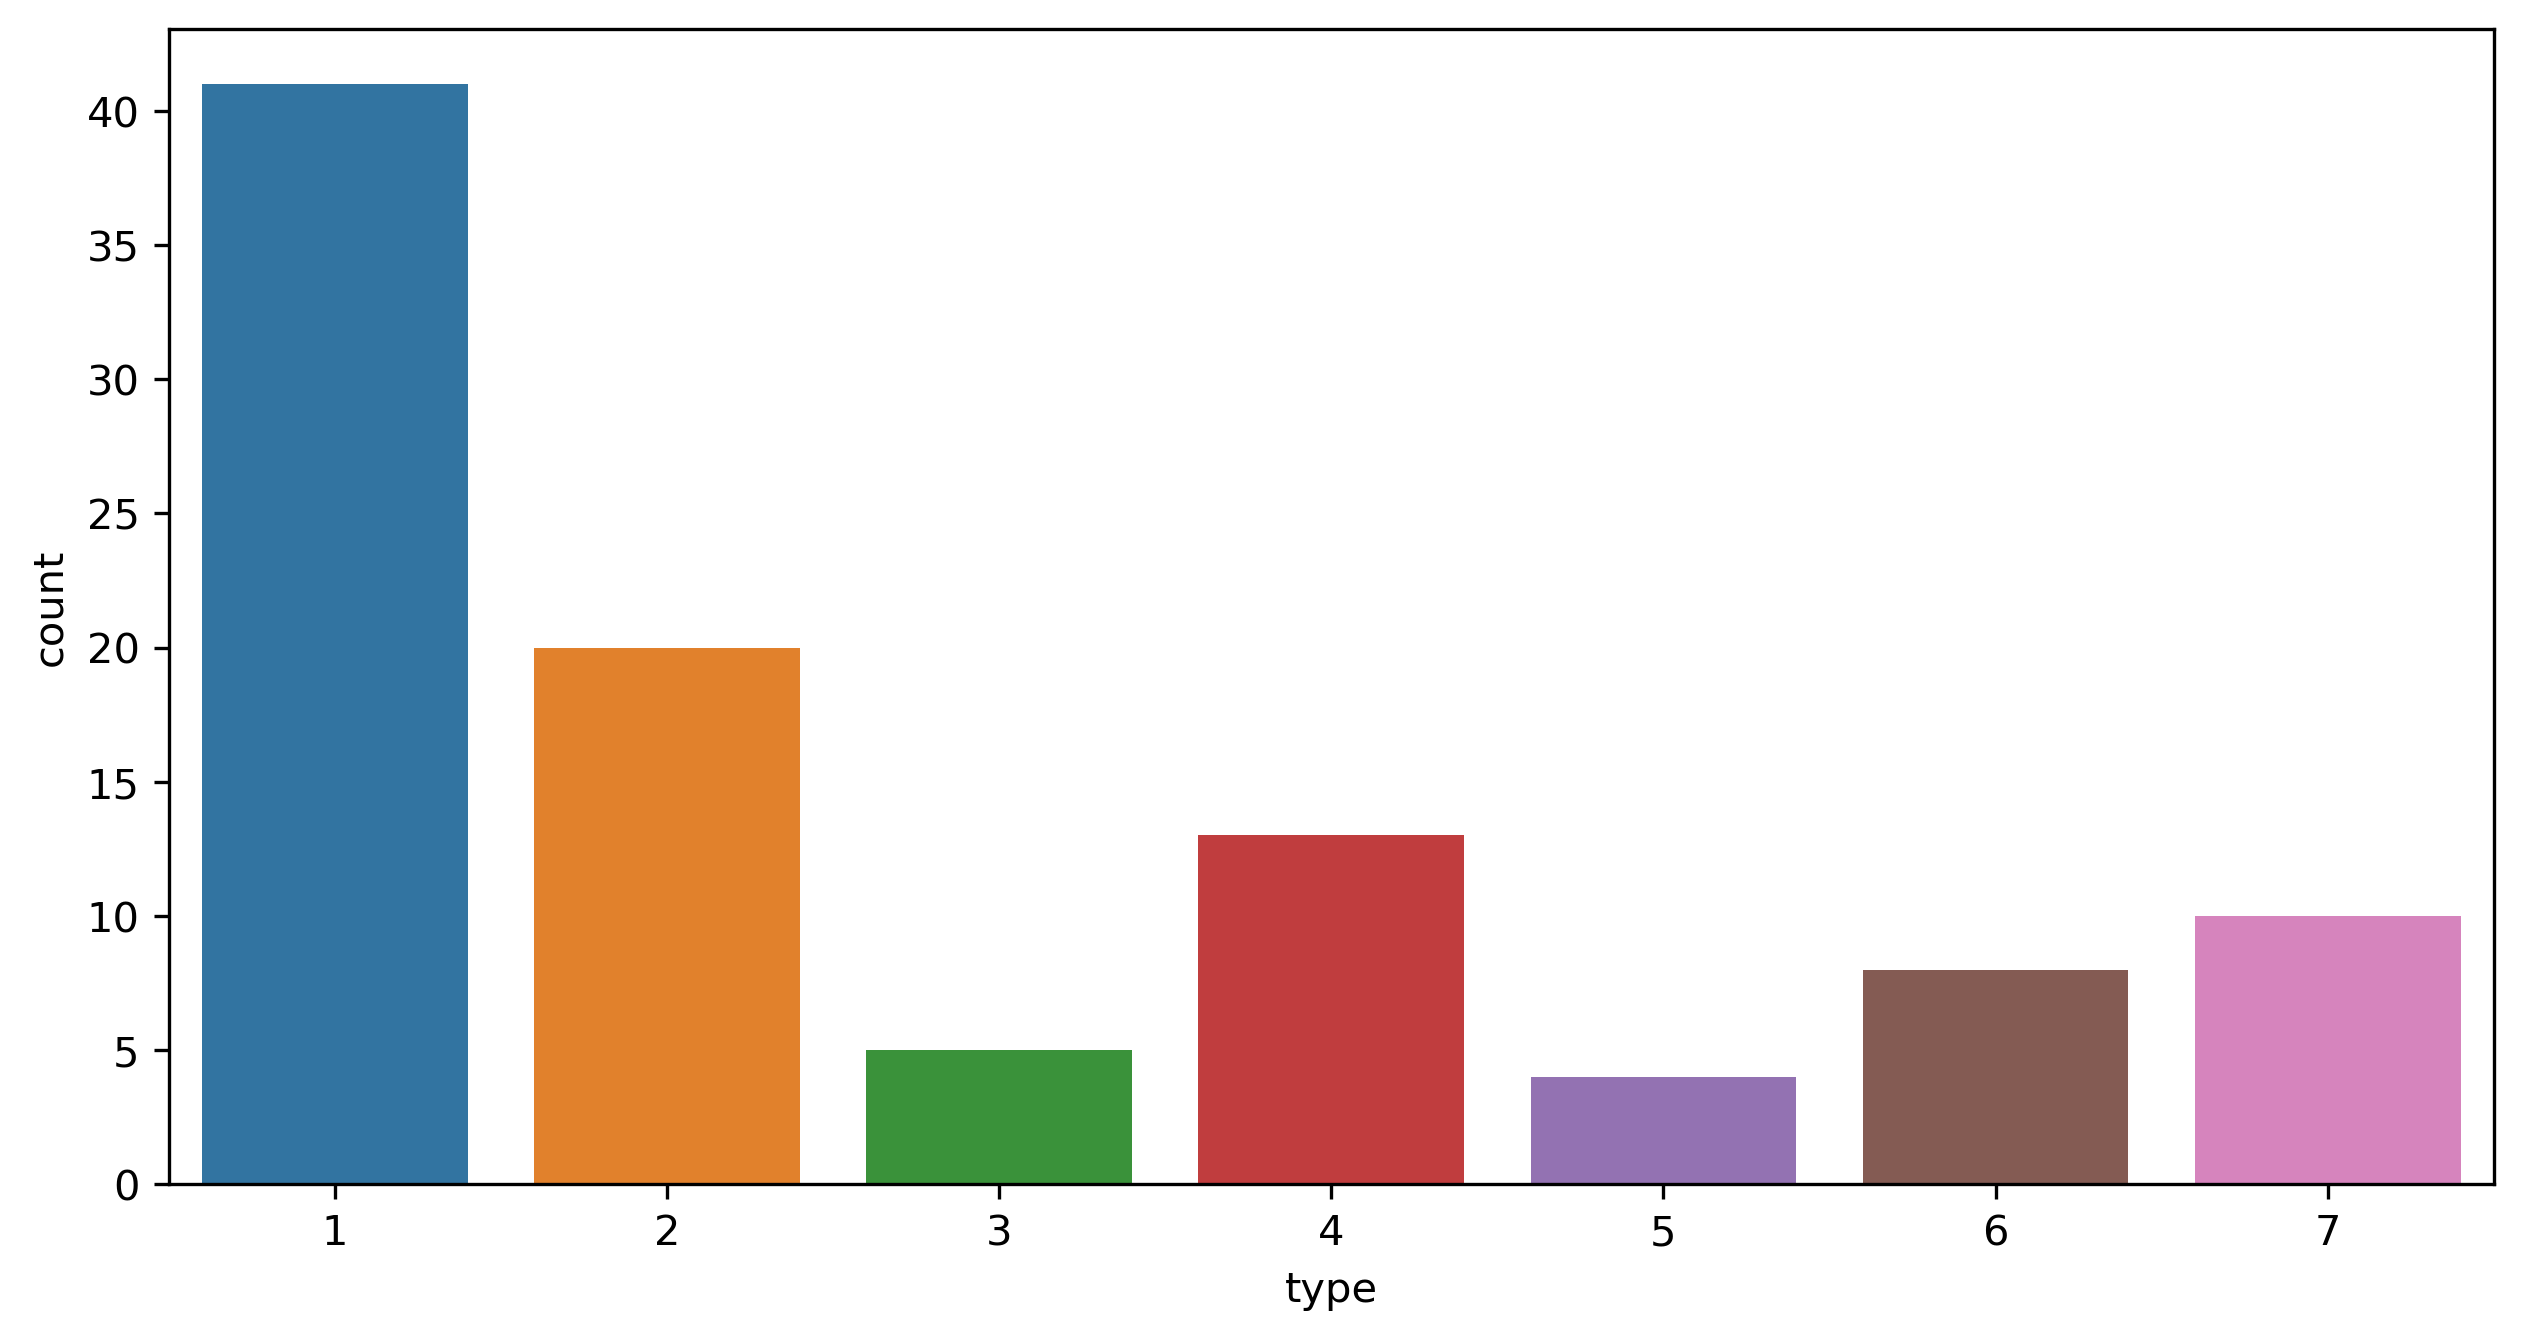

In [9]:
sns.countplot(x = df['type'])

<Axes: xlabel='legs', ylabel='count'>

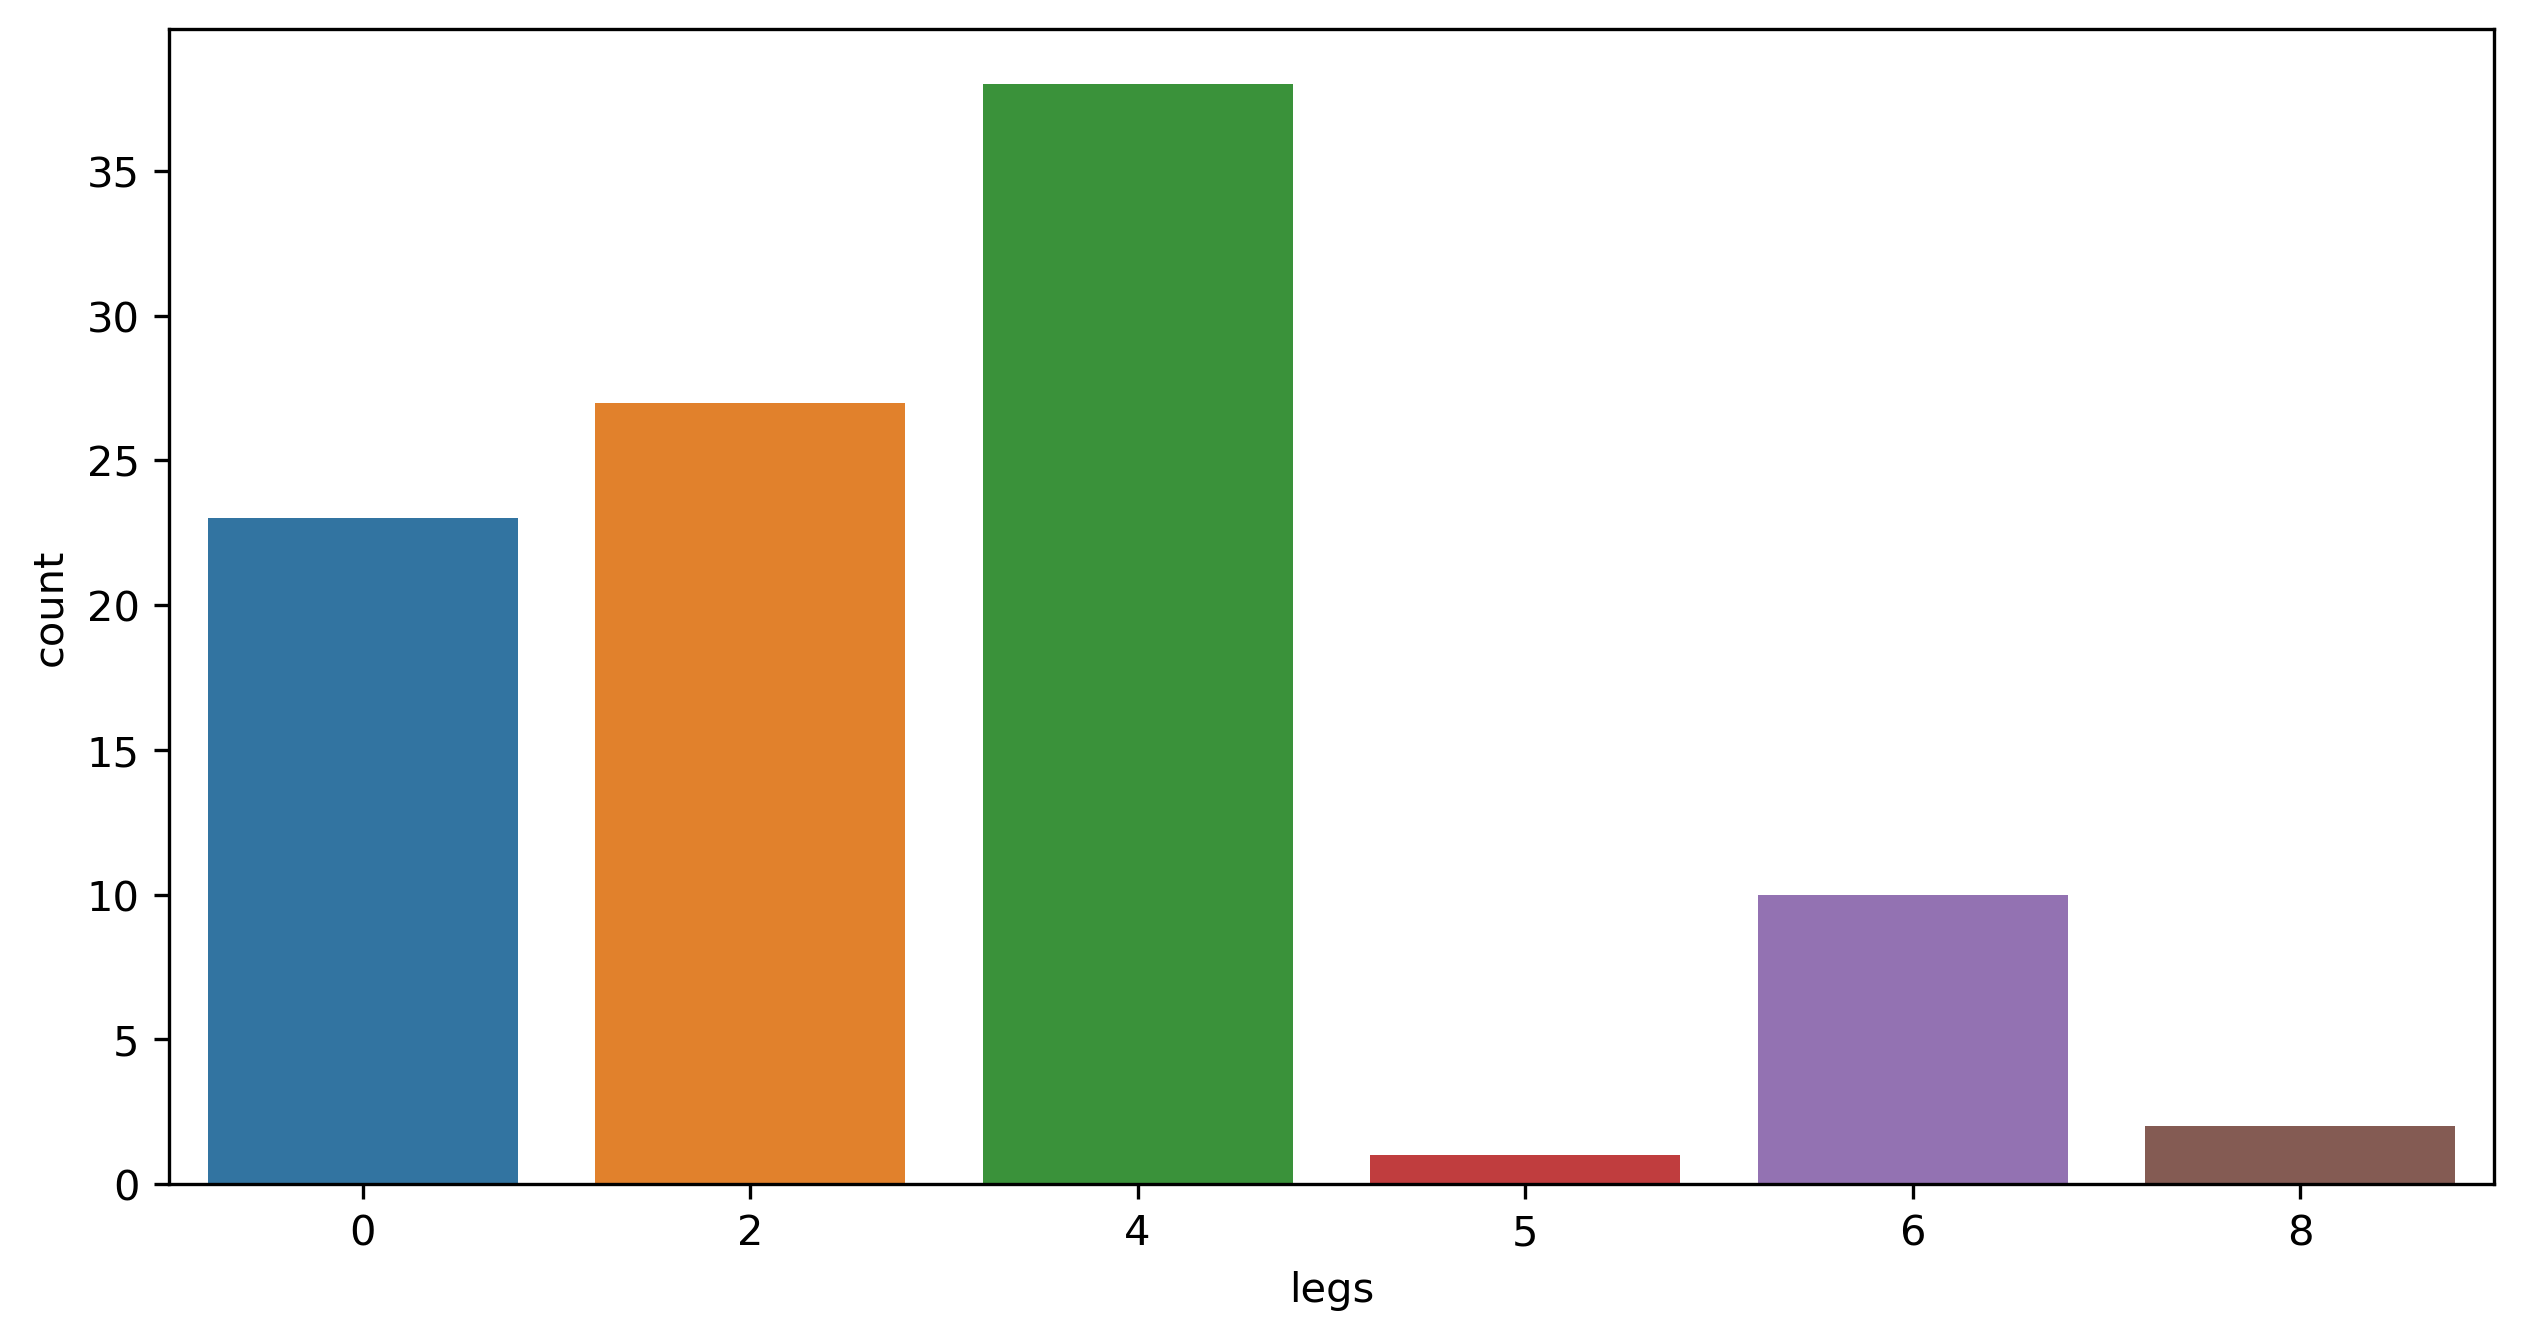

In [10]:
sns.countplot(x =df['legs'])

<Axes: xlabel='legs', ylabel='count'>

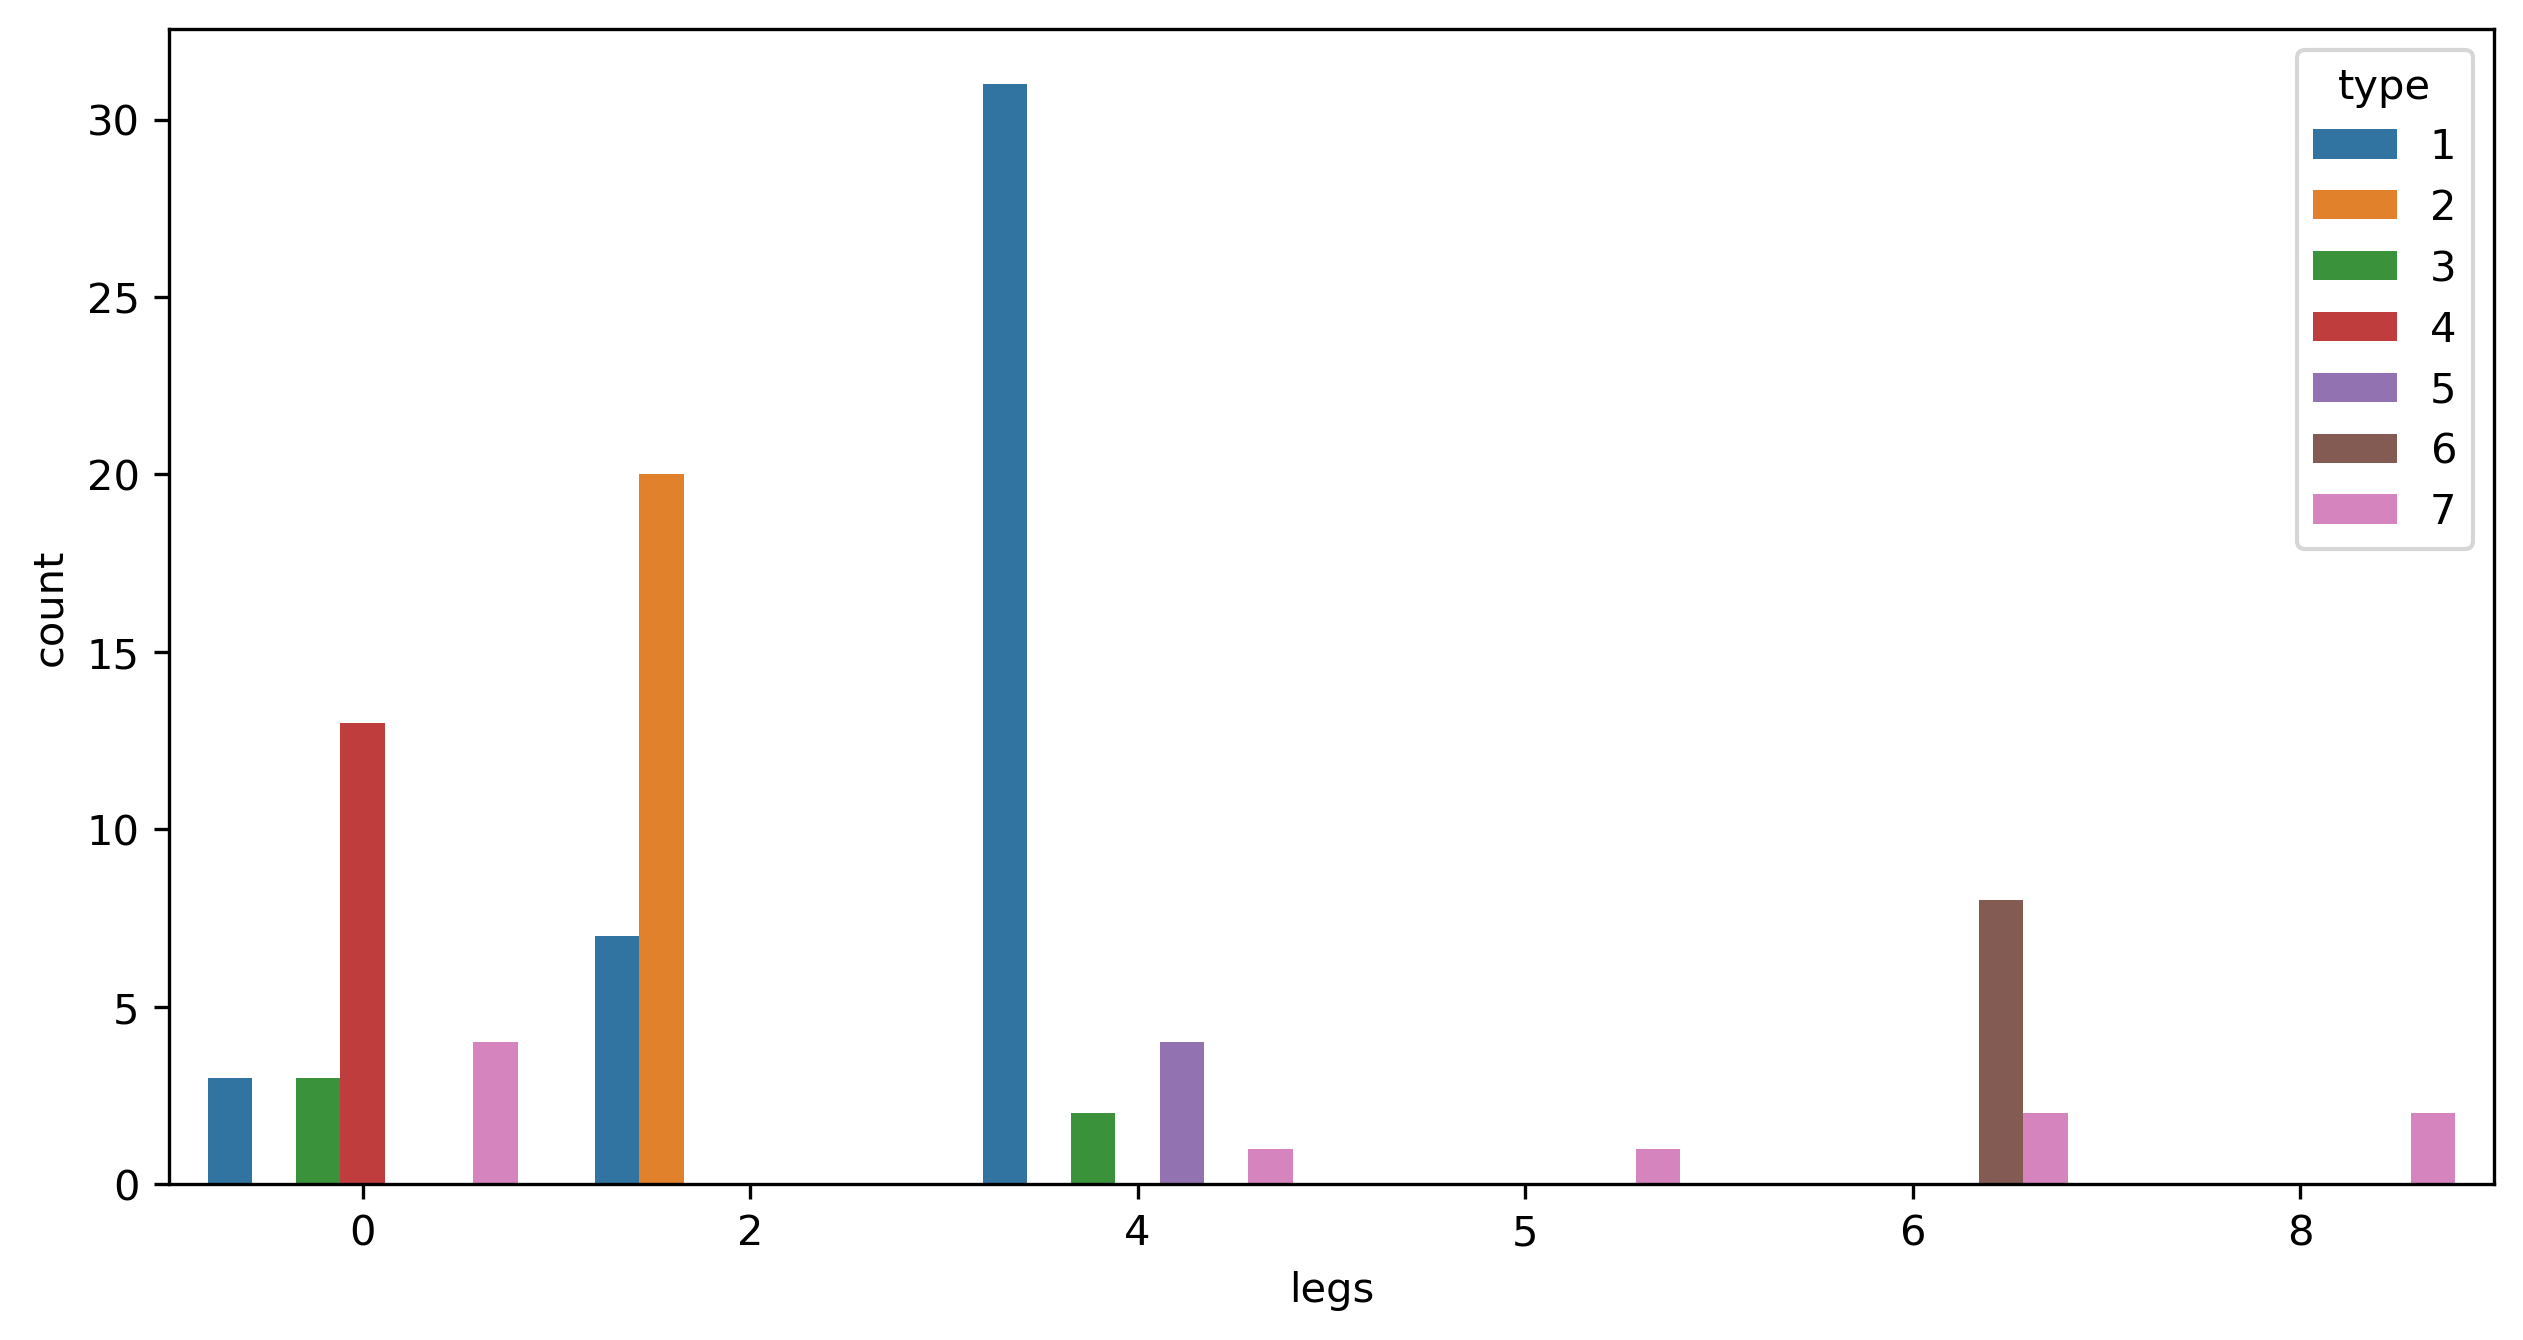

In [11]:
sns.countplot(x = df['legs'],hue='type',data=df)

<Axes: >

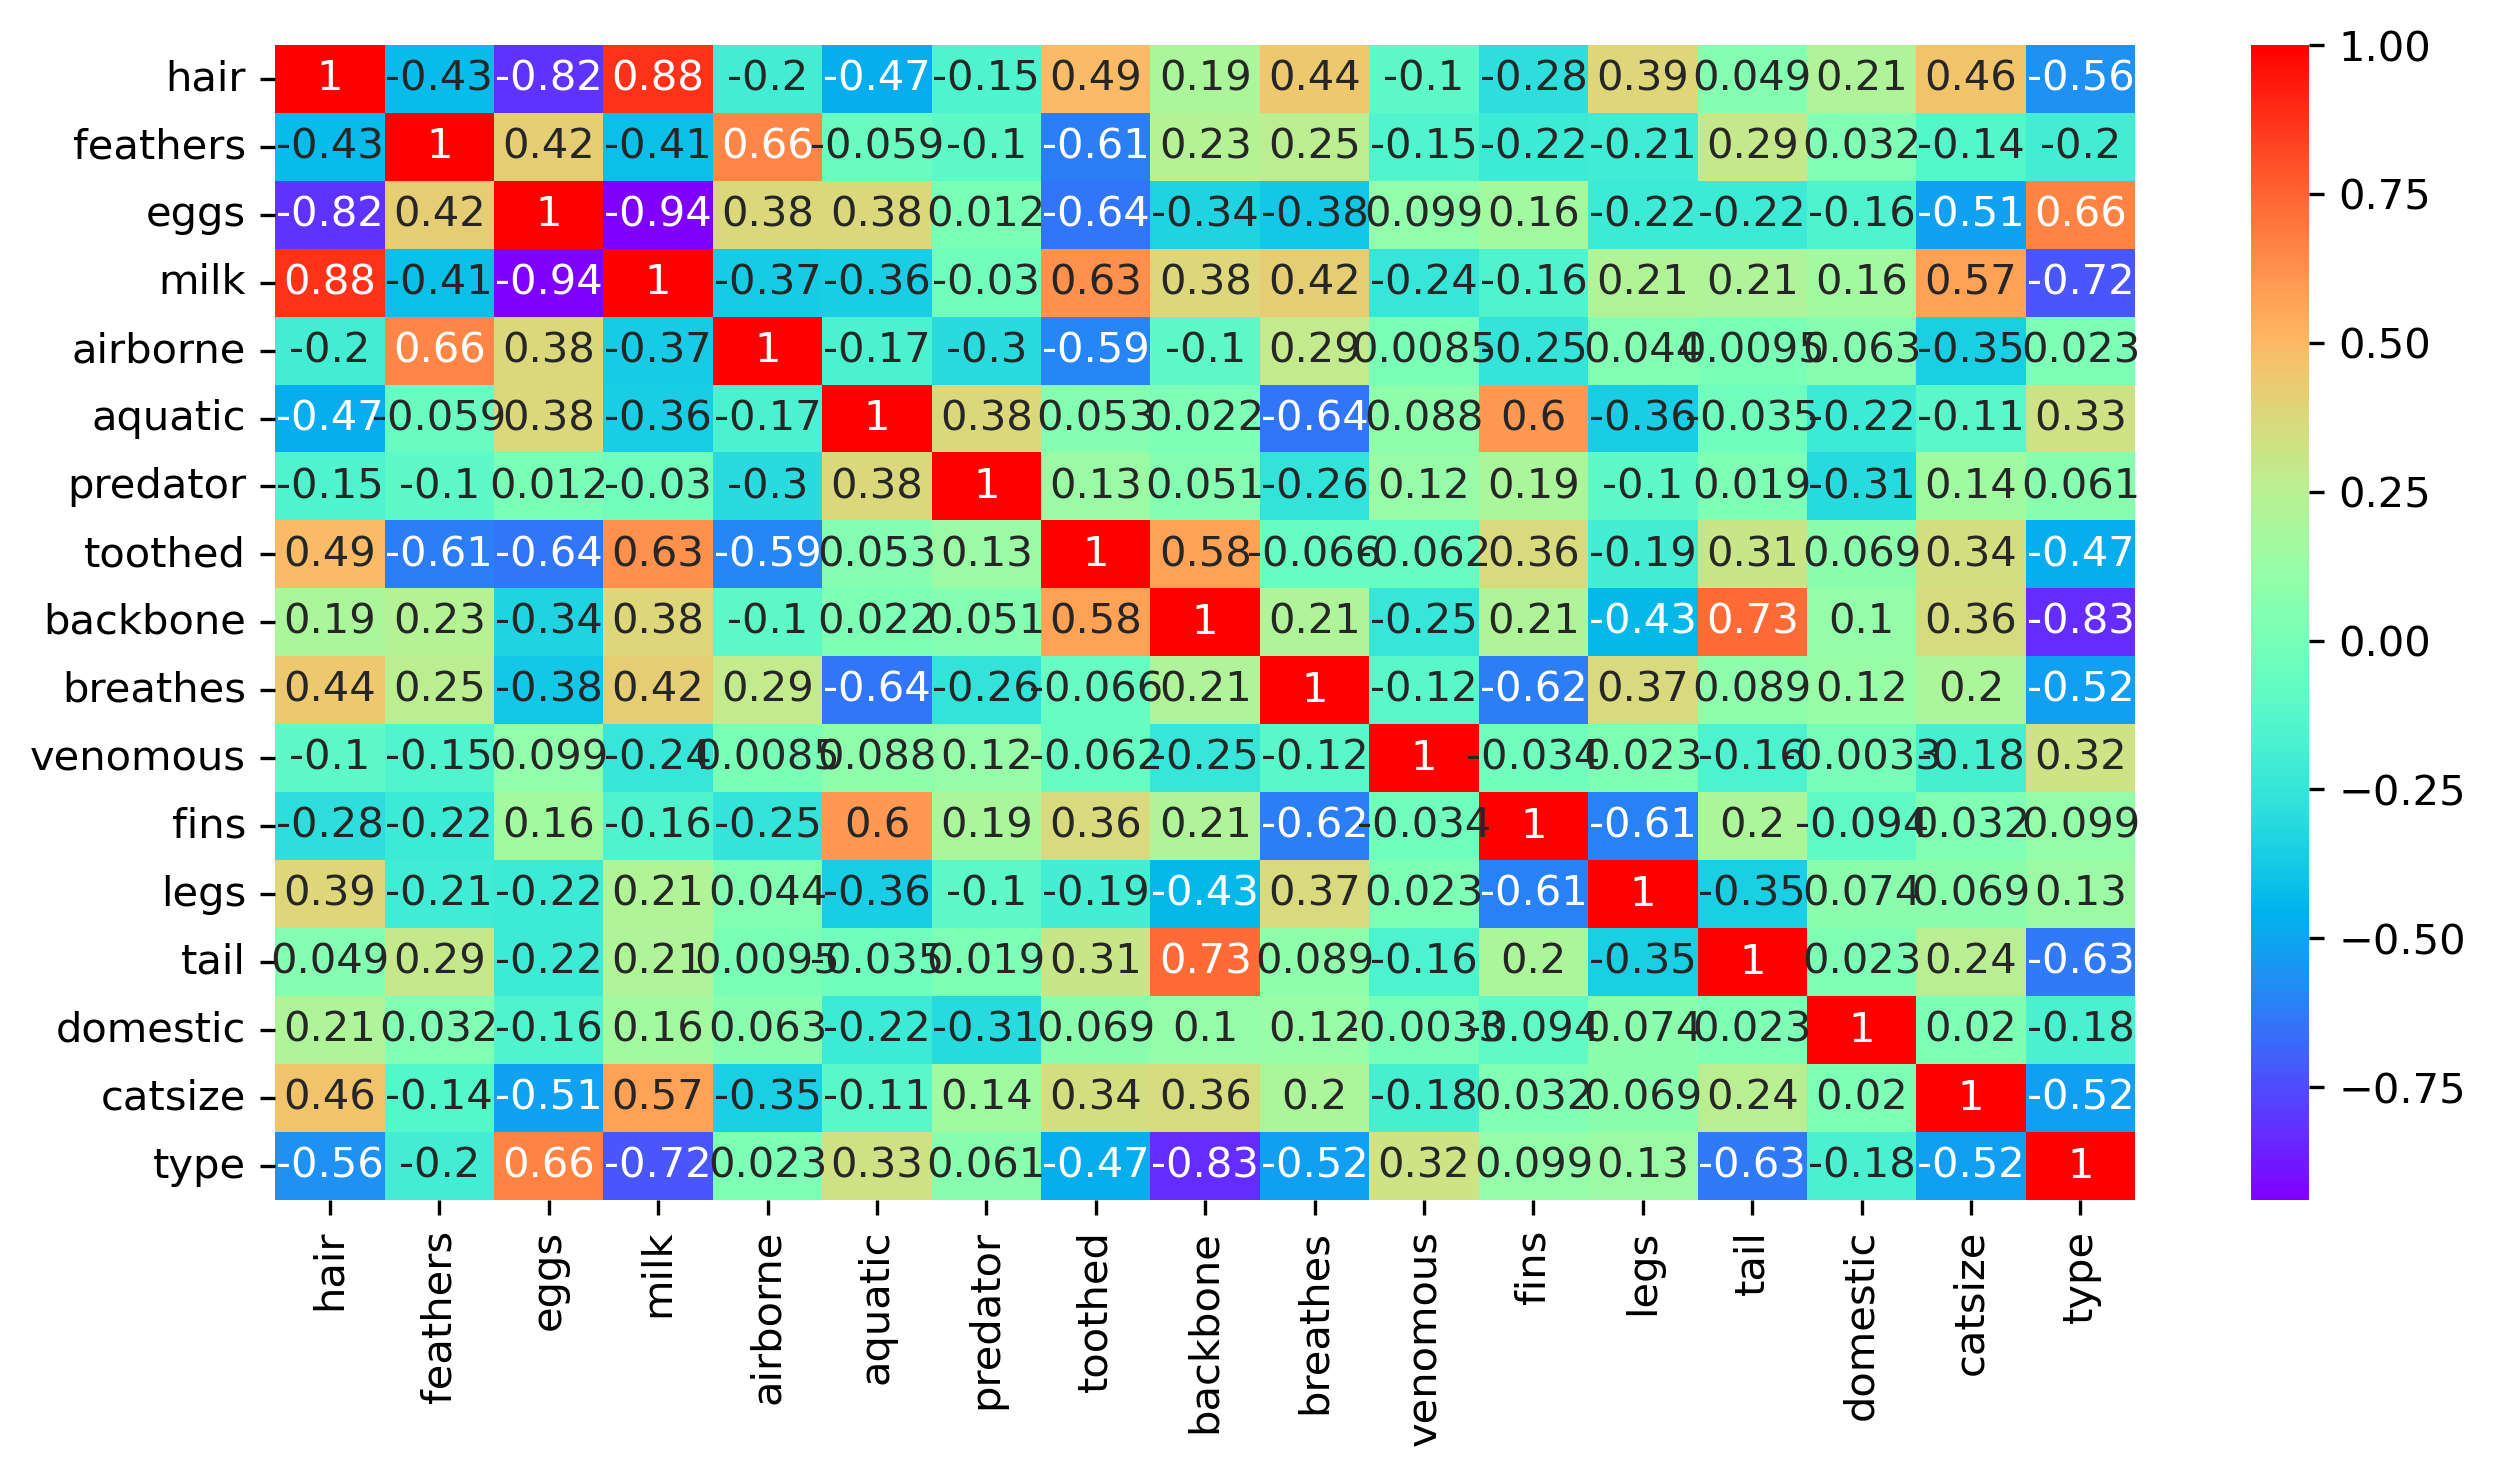

In [12]:
sns.heatmap(df.corr(),annot=True,cmap='rainbow')

### Encoding

In [13]:
# Legs is the only columns with multiple values
# Because of this, our algorithm can consider these values as ordinal, thus affecting our accuracy of our model.
# So this column need to be encoded to reduce complexity of our model.

In [14]:
df = pd.get_dummies(columns=['legs'],data=df,drop_first=True)
df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,tail,domestic,catsize,type,legs_2,legs_4,legs_5,legs_6,legs_8
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,0,0,1,1,0,1,0,0,0
1,antelope,1,0,0,1,0,0,0,1,1,...,0,1,0,1,1,0,1,0,0,0
2,bass,0,0,1,0,0,1,1,1,1,...,1,1,0,0,4,0,0,0,0,0
3,bear,1,0,0,1,0,0,1,1,1,...,0,0,0,1,1,0,1,0,0,0
4,boar,1,0,0,1,0,0,1,1,1,...,0,1,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,...,0,1,0,1,1,1,0,0,0,0
97,wasp,1,0,1,0,1,0,0,0,0,...,0,0,0,0,6,0,0,0,1,0
98,wolf,1,0,0,1,0,0,1,1,1,...,0,1,0,1,1,0,1,0,0,0
99,worm,0,0,1,0,0,0,0,0,0,...,0,0,0,0,7,0,0,0,0,0


In [15]:
df.drop(columns='animal_name',inplace=True)
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,fins,tail,domestic,catsize,type,legs_2,legs_4,legs_5,legs_6,legs_8
0,1,0,0,1,0,0,1,1,1,1,...,0,0,0,1,1,0,1,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,0,1,0,1,1,0,1,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,1,1,0,0,4,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,0,1,1,0,1,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,0,1,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,...,0,1,0,1,1,1,0,0,0,0
97,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,6,0,0,0,1,0
98,1,0,0,1,0,0,1,1,1,1,...,0,1,0,1,1,0,1,0,0,0
99,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,7,0,0,0,0,0


### Standardization & Defining x & y

In [16]:
# As KNN algorithm uses distance calculation(Eucledian/Manhattan), thus standardization becomes important.

In [17]:
sc = StandardScaler()

In [18]:
x1 = df.drop(columns='type')
y = df['type']
x1

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,tail,domestic,catsize,legs_2,legs_4,legs_5,legs_6,legs_8
0,1,0,0,1,0,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0
1,1,0,0,1,0,0,0,1,1,1,0,0,1,0,1,0,1,0,0,0
2,0,0,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0
4,1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,1,0,1,1,0,0,0,0
97,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
98,1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,0,0,0
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [19]:
x = sc.fit_transform(x1)
x

array([[ 1.16139451, -0.49690399, -1.18522652, ..., -0.1       ,
        -0.33149677, -0.14213381],
       [ 1.16139451, -0.49690399, -1.18522652, ..., -0.1       ,
        -0.33149677, -0.14213381],
       [-0.86103386, -0.49690399,  0.84372057, ..., -0.1       ,
        -0.33149677, -0.14213381],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ..., -0.1       ,
        -0.33149677, -0.14213381],
       [-0.86103386, -0.49690399,  0.84372057, ..., -0.1       ,
        -0.33149677, -0.14213381],
       [-0.86103386,  2.01246118,  0.84372057, ..., -0.1       ,
        -0.33149677, -0.14213381]])

### Model Building

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
knn = KNeighborsClassifier(metric='euclidean')     # Using Euclidean Distance Metric

In [25]:
model = knn.fit(xtrain,ytrain)

In [26]:
ypred = knn.predict(xtest)

In [27]:
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         0
           4       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.83      0.78      0.80        21
weighted avg       1.00      0.95      0.97        21



In [28]:
knn.score(xtrain,ytrain), knn.score(xtest,ytest)

(0.9875, 0.9523809523809523)

### Hyper-Parameter Tuning for KNN

In [29]:
# Finding optimum K value to maximize our model accuracy

In [30]:
train_acc = []
test_acc = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    train_acc.append(knn.score(xtrain,ytrain))
    test_acc.append(knn.score(xtest,ytest))

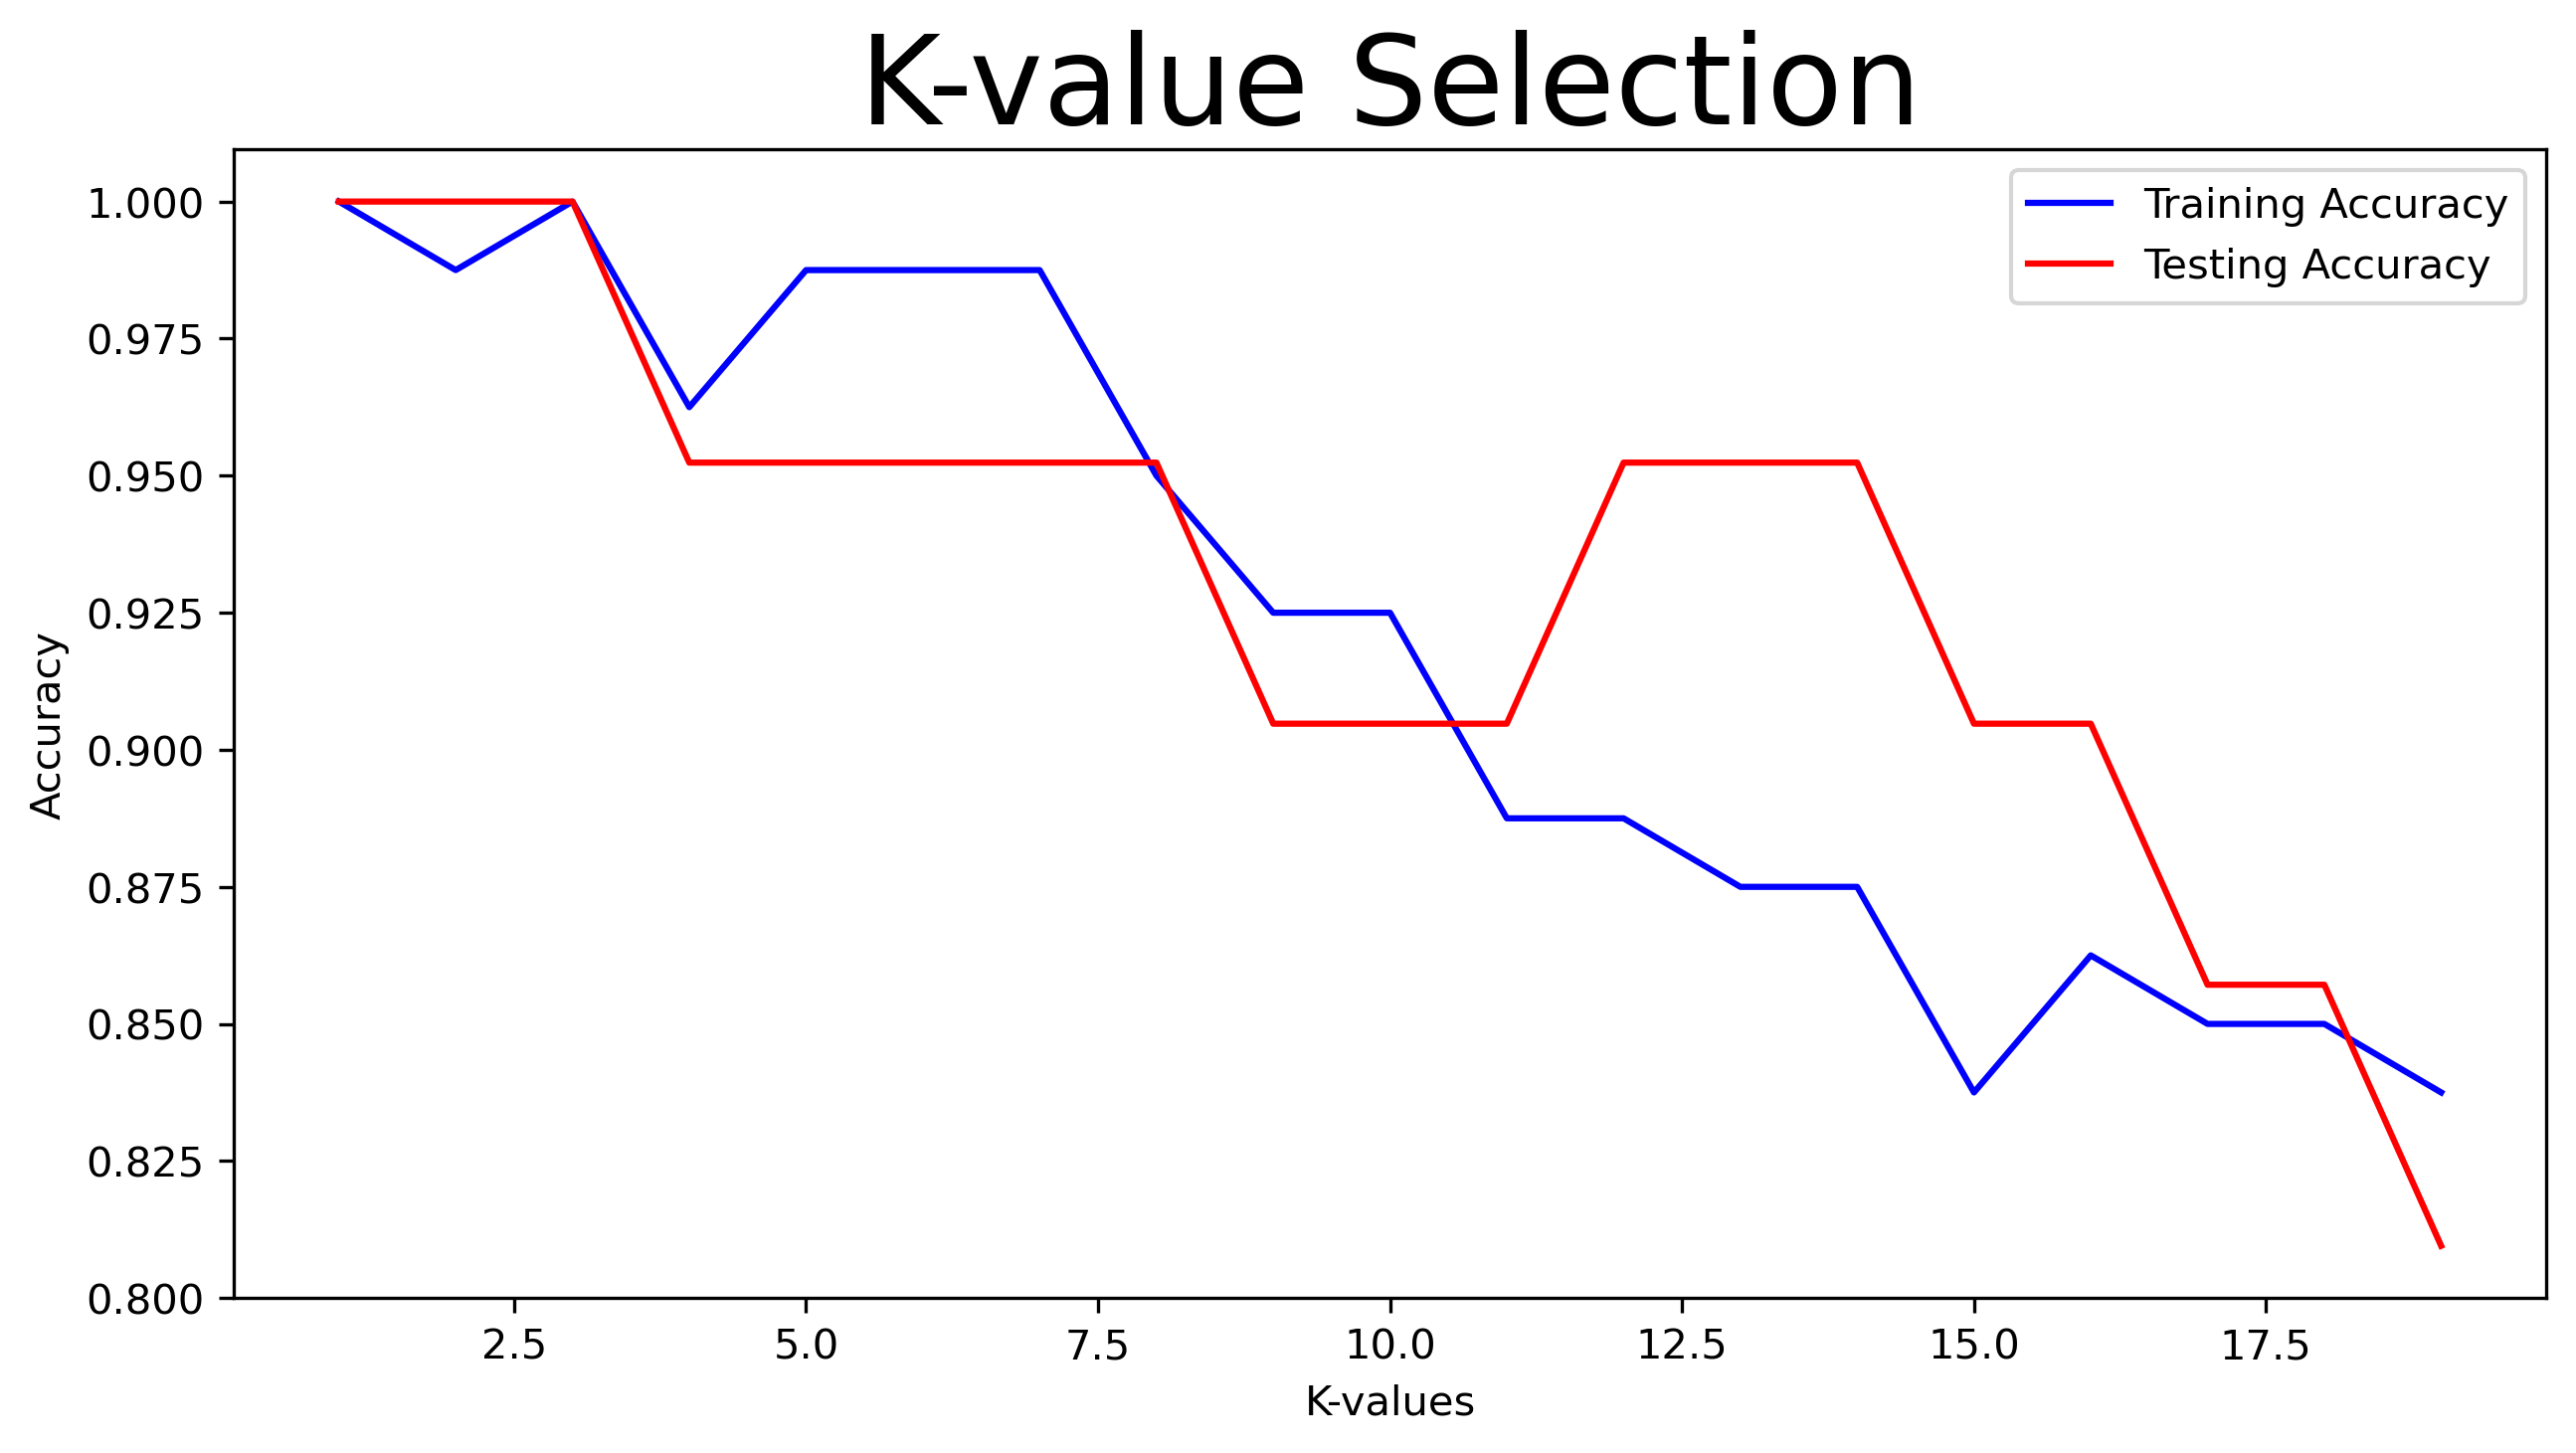

In [31]:
plt.plot(range(1,20), train_acc, color = 'blue', label = 'Training Accuracy')
plt.plot(range(1,20), test_acc, color = 'red', label = 'Testing Accuracy')
plt.xlabel('K-values')
plt.ylabel('Accuracy')
plt.title('K-value Selection', size = 30)
plt.legend()

In [32]:
# Optimum Value of k = 1

In [33]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
print(f"Train: {knn.score(xtrain,ytrain)}\nTest: {knn.score(xtest,ytest)}")

Train: 1.0
Test: 1.0


### Evaluating Model

In [34]:
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [35]:
accuracy = accuracy_score(ytest, ypred)
precision = precision_score(ytest, ypred, average='weighted')
recall = recall_score(ytest, ypred, average='weighted')
f1 = f1_score(ytest, ypred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


### Visualizing Decision Boundary

In [36]:
# Visualizing requires data to be in 2D form, thus we use PCA to reduce dimensionality of our dataset

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA(n_components=2)

In [39]:
x_train_pca = pca.fit_transform(xtrain)
x_test_pca = pca.transform(xtest)

In [40]:
# Here we fit KNN model on our 2D dataset to train.

In [41]:
knn_pca = KNeighborsClassifier(n_neighbors=1)
knn_pca.fit(x_train_pca, ytrain)

KNeighborsClassifier(n_neighbors=1)

In [42]:
# Next we create mesh grid to evaluate decision of classifier

In [43]:
x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
x2, y2 = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [44]:
Z = knn_pca.predict(np.c_[x2.ravel(), y2.ravel()])
Z = Z.reshape(x2.shape)

Text(0.5, 1.0, 'Decision Boundary Visualization using PCA')

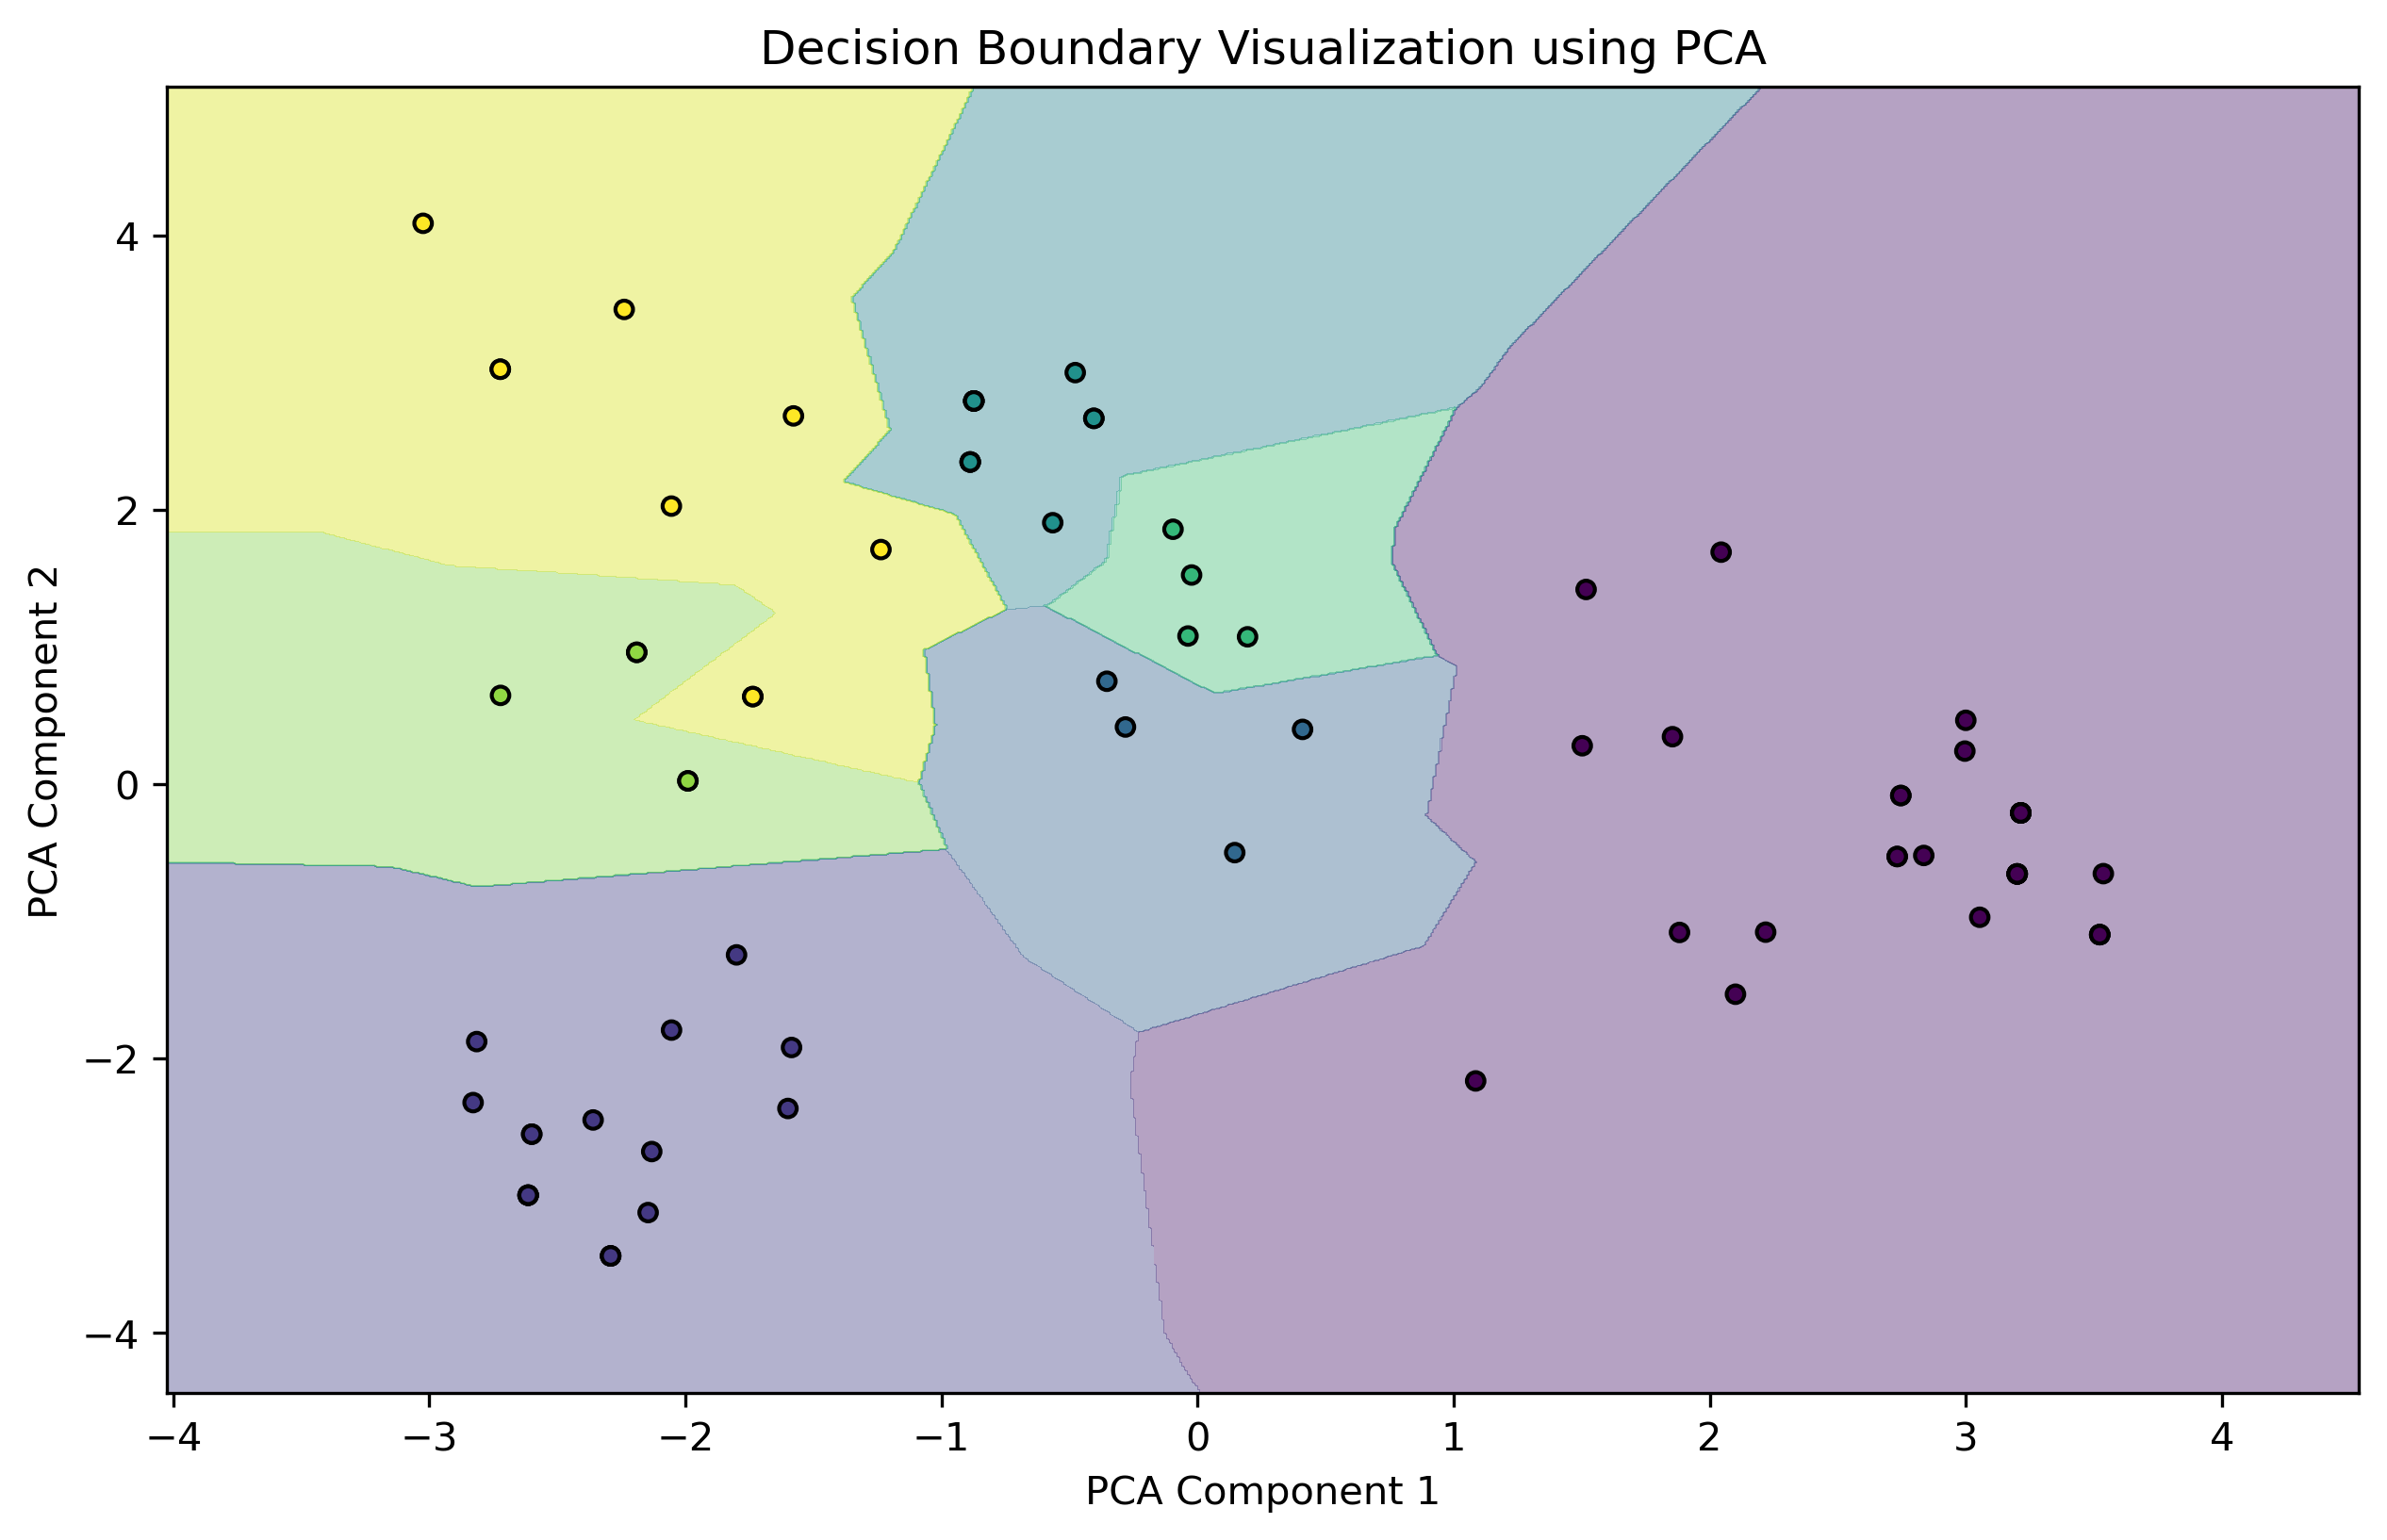

In [45]:
plt.figure(figsize=(10, 6))
plt.contourf(x2, y2, Z, alpha=0.4)
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=ytrain, edgecolor='k', marker='o', s=20)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Decision Boundary Visualization using PCA')